<a href="https://colab.research.google.com/github/ohjeonsuk/python-education/blob/main/L231110.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

딥러닝

- ANN

- 경사하강법

- 오차역전파

- Optimizer

- CNN

- ResNet

- RNN, LSTM, GRU

In [ ]:
 import numpy as np
 import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.datasets import mnist, fashion_mnist

In [ ]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

기본 사용법

Epoch 1/20
480/480 [==============================] - 5s 6ms/step - loss: 0.4727 - accuracy: 0.8634 - val_loss: 0.2275 - val_accuracy: 0.9356
Epoch 2/20
 31/480 [>.............................] - ETA: 2s - loss: 0.2624 - accuracy: 0.9226

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


480/480 [==============================] - 5s 10ms/step - loss: 0.2412 - accuracy: 0.9305 - val_loss: 0.1701 - val_accuracy: 0.9507
Epoch 3/20
480/480 [==============================] - 4s 9ms/step - loss: 0.1889 - accuracy: 0.9454 - val_loss: 0.1382 - val_accuracy: 0.9589
Epoch 4/20
480/480 [==============================] - 3s 6ms/step - loss: 0.1593 - accuracy: 0.9536 - val_loss: 0.1187 - val_accuracy: 0.9643
Epoch 5/20
480/480 [==============================] - 3s 6ms/step - loss: 0.1394 - accuracy: 0.9594 - val_loss: 0.1140 - val_accuracy: 0.9656
Epoch 6/20
480/480 [==============================] - 4s 7ms/step - loss: 0.1278 - accuracy: 0.9622 - val_loss: 0.1034 - val_accuracy: 0.9696
Epoch 7/20
480/480 [==============================] - 3s 6ms/step - loss: 0.1161 - accuracy: 0.9646 - val_loss: 0.0967 - val_accuracy: 0.9715
Epoch 8/20
480/480 [==============================] - 3s 6ms/step - loss: 0.1064 - accuracy: 0.9676 - val_loss: 0.0975 - val_accuracy: 0.9702
Epoch 9/20
480/4

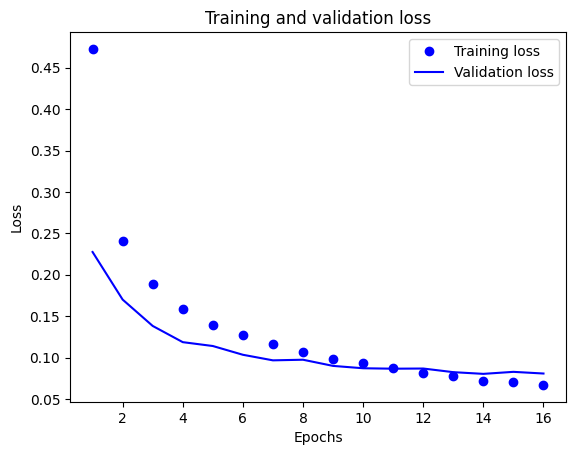

In [ ]:
#1. 데이터셋 만들기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2,
                                                  random_state=156)

#2. 모델 생성
def model_fn(user_layer=None):
    model=Sequential()
    #model.add(Flatten(input_shape=(28,28)))
    model.add(Dense(100, activation='relu'), input_shape=(784,))
    if user_layer:
        model.add(user_layer)
    model.add(Dense(10, activation='softmax'))
    return model

model = model_fn(Dropout(0.3))

#3. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

checkpoint_cb = ModelCheckpoint('best-model.h5', save_best_only=True)

earlystopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

#4. 학습, 훈련
history = model.fit(x_train, y_train, epochs=20, batch_size=100,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, earlystopping_cb])

#5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=100)
print(loss_and_metrics)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(loss, val_loss)
print(acc, val_acc)

#6. 그래프 그리기
epochs = range(1,  len(acc)+1)
plt.clf()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
x_train[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

예제:

먼지가 있는 상태 1, 먼지가 없는 상태 0 인 이미지 만들기

In [ ]:
import random

In [ ]:
#이미지 1장 만드는 함수
def generate_image(a=None, width=16, height=16):
    random.seed(a)
    resolution = range(width*height)
    number_of_points = random.choice(resolution) #먼지의 개수 10 -> 1로 색칠
    idx = random.sample(resolution, number_of_points) # 256개 픽셀중 10개 픽셀의 번호 선택
    row_list = [1 if (i in idx) else 0 for i in resolution]
    array = np.array(row_list).reshape(width, height)
    nop_target = np.array([number_of_points])
    return (array, nop_target)

#데이터셋(이미지 여러장) 만드는 함수
def data_set(samples):
    data = []
    labels = []
    for i in range(samples):
        x, y = generate_image(i)
        data.append(x)
        labels.append(y)
    data = np.array(data)
    labels = np.array(labels)
    return (data, labels)

In [ ]:
x_train, y_train = data_set(1500)

In [ ]:
x_train.shape

(1500, 16, 16)

In [ ]:
y_train.shape

(1500, 1)

In [ ]:
y_train

array([[197],
       [ 68],
       [ 28],
       ...,
       [ 42],
       [ 76],
       [182]])

In [ ]:
y_train[12][0]

242

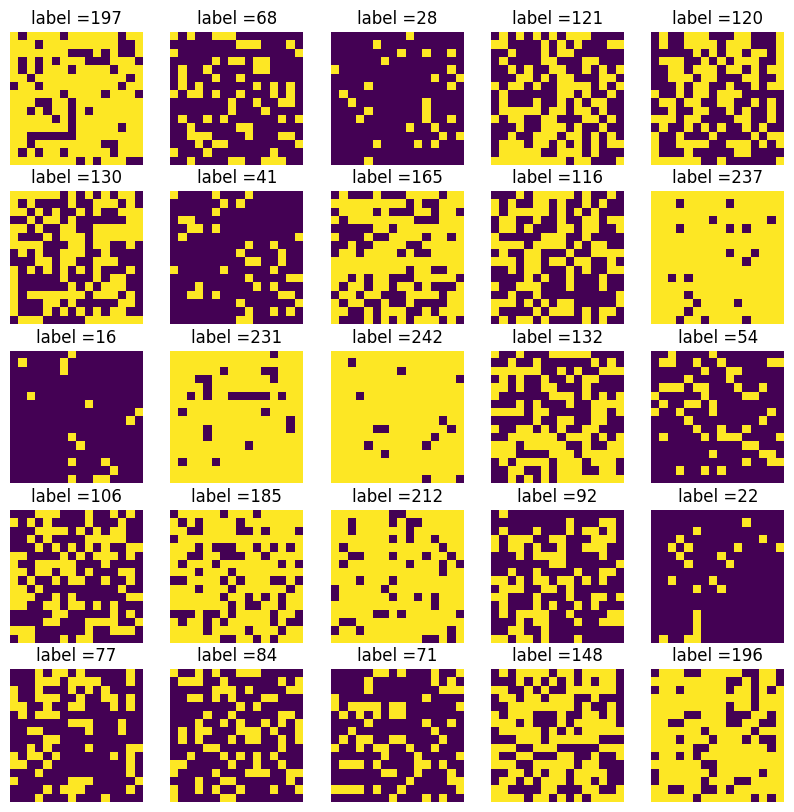

In [ ]:
plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10,10)

f, ax = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = ax[i//plt_row, i%plt_col]
    sub_plt.imshow(x_train[i])
    sub_plt.set_title('label ='+ str(y_train[i][0]))
    sub_plt.axis('off')
plt.show()

In [ ]:
x_val, y_val = data_set(300)

In [ ]:
x_test, y_test = data_set(100)

In [ ]:
x_val.shape, y_val.shape, x_test.shape, y_test.shape

((300, 16, 16), (300, 1), (100, 16, 16), (100, 1))

loss = 'mse'

metrics = 'mae'

마지막 출력층 활성화 함수 = 없음

#보편적 머신러닝 작업 흐름

< 케라스 창시자에게 배우는 딥러닝, 프랑스와 숄레, 길벗>

0. EDA

1. 주어진 입력으로 출력이 예측 가능한지 여부

2. 데이터와 출력 사이의 관계를 학습하는데 정보가 충분한가

3. 마지막 층의 활성화 함수 선택

4. 손실함수 설정

5. 최적화 설정

6. 과대적합 만들기

        층을 추가한다.

        층의 크기를 키운다.

        에포크를 높인다.

7. 드롭아웃, 층의 추가 제거, 하이퍼파라미터 변경, 특성공학

In [ ]:
w=16
h=16
x_train.shape

(1500, 16, 16)

In [ ]:
x_train[0]

array([[1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0]])

In [ ]:
x_train_1d = x_train.reshape(x_train.shape[0], w*h)
x_val_1d = x_val.reshape(x_val.shape[0], w*h)
x_test_1d = x_test.reshape(x_test.shape[0], w*h)

In [ ]:
x_train_1d.shape, x_val_1d.shape, x_test_1d.shape

((1500, 256), (300, 256), (100, 256))

In [ ]:
def model_fn(user_layer=None):
    model = Sequential()
    model.add(Dense(100, activation='relu'), input_shape=(256,))
    if user_layer:
        model.add(user_layer)
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    return model
model = model_fn(Dropout(0.3))

In [ ]:
model.compile(loss='mse', optimizer ='adam', metrics='mae')
checkpoint_cb = ModelCheckpoint('best-model.h5', save_best_only=True)

earlystopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
history = model.fit(x_train_1d, y_train, epochs=20, batch_size=100,
                    validation_data=(x_val_1d, y_val),
                    callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/20
15/15 [==============================] - 1s 32ms/step - loss: 19334.4316 - mae: 119.6365 - val_loss: 15274.2734 - val_mae: 106.1596
Epoch 2/20
 9/15 [=================>............] - ETA: 0s - loss: 12593.6719 - mae: 96.5215 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/15 [==============================] - 0s 13ms/step - loss: 9989.3096 - mae: 84.0987 - val_loss: 3257.6646 - val_mae: 48.7864
Epoch 3/20
15/15 [==============================] - 0s 11ms/step - loss: 1192.1488 - mae: 24.7635 - val_loss: 588.2371 - val_mae: 21.2603
Epoch 4/20
15/15 [==============================] - 0s 12ms/step - loss: 615.6576 - mae: 17.3136 - val_loss: 80.8849 - val_mae: 7.4137
Epoch 5/20
15/15 [==============================] - 0s 10ms/step - loss: 401.1209 - mae: 14.0042 - val_loss: 17.1268 - val_mae: 3.3869
Epoch 6/20
15/15 [==============================] - 0s 12ms/step - loss: 308.6699 - mae: 12.3851 - val_loss: 3.4227 - val_mae: 1.5325
Epoch 7/20
15/15 [==============================] - 0s 9ms/step - loss: 310.1942 - mae: 12.3110 - val_loss: 17.6834 - val_mae: 3.4416
Epoch 8/20
15/15 [==============================] - 0s 12ms/step - loss: 328.4276 - mae: 12.6119 - val_loss: 2.8987 - val_mae: 1.3977
Epoch 9/20
15/15 [==============================] - 0s 10ms/st

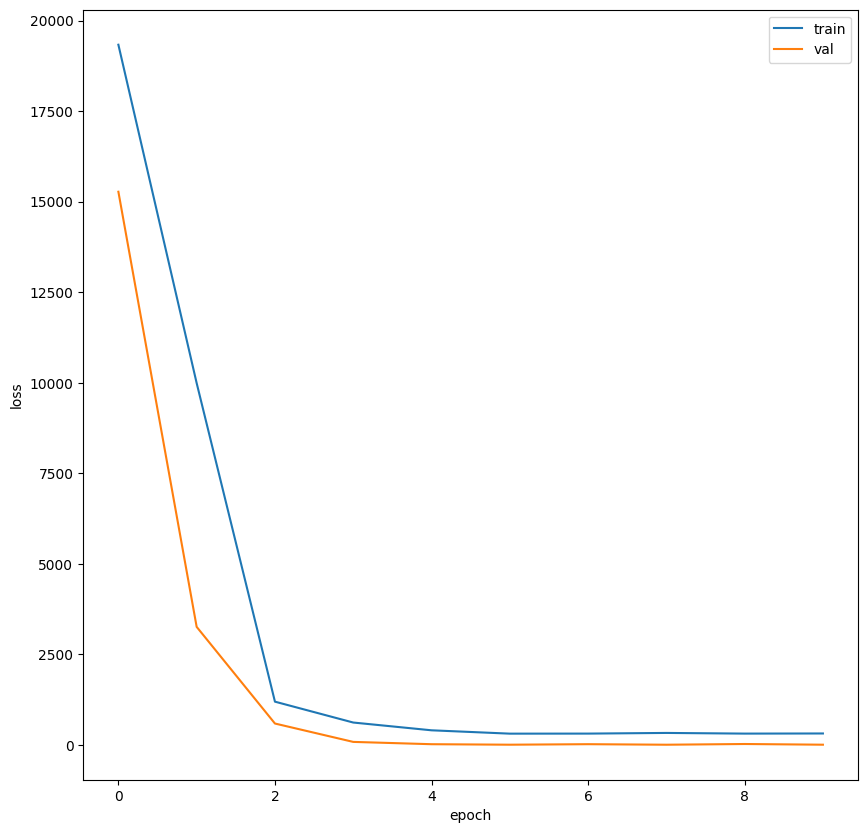

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'val'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.evaluate(x_val_1d, y_val)

10/10 [==============================] - 0s 4ms/step - loss: 2.8987 - mae: 1.3977


[2.8986763954162598, 1.3977006673812866]

In [ ]:
score = model.evaluate(x_test_1d, y_test, batch_size=100)
score

1/1 [==============================] - 0s 50ms/step - loss: 3.2258 - mae: 1.4764


[3.2257566452026367, 1.4763604402542114]

모델 사용하기

In [ ]:
x_test_1d.shape

(100, 256)

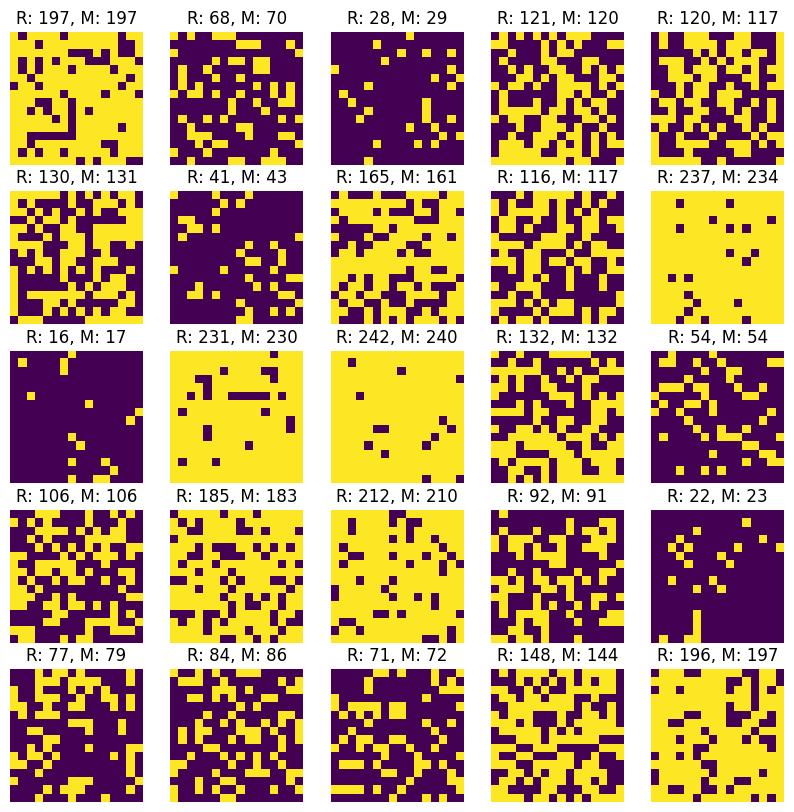

In [ ]:
#y_test_hat = model.predict(x_test_1d, batch_size=100)

plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10,10)

f, ax = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = ax[i//plt_row, i%plt_col]
    sub_plt.imshow(x_test_1d[i].reshape(w, h))
    sub_plt.set_title(f'R: {y_test[i][0]}, M: {y_test_hat[i][0]:.0f}')
    sub_plt.axis('off')
plt.show()

#이진 분류

영화 리뷰 데이터 : 긍정/부정 분류

마지막층 활성화 함수 : sigmoid

손실함수 : binary_crossentropy

optimizer : rmsprop

은닉층의 할성화 함수 : relu, 3개층

0 : 부정, 1: 긍정

마지막층 노드 수 : 1개


In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels.shape

(25000,)

In [ ]:
test_data.shape, test_labels.shape

((25000,), (25000,))

In [ ]:
type(train_data[0])

list

a 10문장


b 30문장

(2, [])


In [ ]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
for i in train_data[:10]:
    print(len(i))

218
189
141
550
147
43
123
562
233
130


In [ ]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
train_data[5]

[1,
 778,
 128,
 74,
 12,
 630,
 163,
 15,
 4,
 1766,
 7982,
 1051,
 2,
 32,
 85,
 156,
 45,
 40,
 148,
 139,
 121,
 664,
 665,
 10,
 10,
 1361,
 173,
 4,
 749,
 2,
 16,
 3804,
 8,
 4,
 226,
 65,
 12,
 43,
 127,
 24,
 2,
 10,
 10]

In [ ]:
for sequence in train_data[:10]:
    print(max(sequence))

7486
9837
6905
9941
7224
7982
9363
9820
7612
8419


In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
train_data[5]

In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
reverse_word_index

In [ ]:
' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

단어 사전의 예

the - 1

and - 2

train data 작성시

패드, 시작, 없음

the - 4

In [ ]:
for i in train_data[:10]:
    print(len(i))

218
189
141
550
147
43
123
562
233
130


In [ ]:
train_data.shape

(25000,)

train_data.shape -> (25000, 10000)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape, x_test.shape

((25000, 10000), (25000, 10000))

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train.shape

(25000,)

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 10000), (25000,), (25000, 10000), (25000,))

In [ ]:
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((15000, 10000), (15000,), (25000, 10000), (25000,), (10000, 10000), (10000,))

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 104ms/step - loss: 0.5242 - accuracy: 0.7833 - val_loss: 0.4003 - val_accuracy: 0.8621
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.3273 - accuracy: 0.8937 - val_loss: 0.3160 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 2s 77ms/step - loss: 0.2449 - accuracy: 0.9201 - val_loss: 0.2883 - val_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 4s 133ms/step - loss: 0.1968 - accuracy: 0.9344 - val_loss: 0.2873 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 5s 170ms/step - loss: 0.1648 - accuracy: 0.9461 - val_loss: 0.2788 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 2s 50ms/step - loss: 0.1395 - accuracy: 0.9546 - val_loss: 0.2857 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 3s 101ms/step - loss: 0.1187 - accuracy: 0.9627 - val_loss: 0.3135 - val_accuracy: 0.8820
Epoch 8/2

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

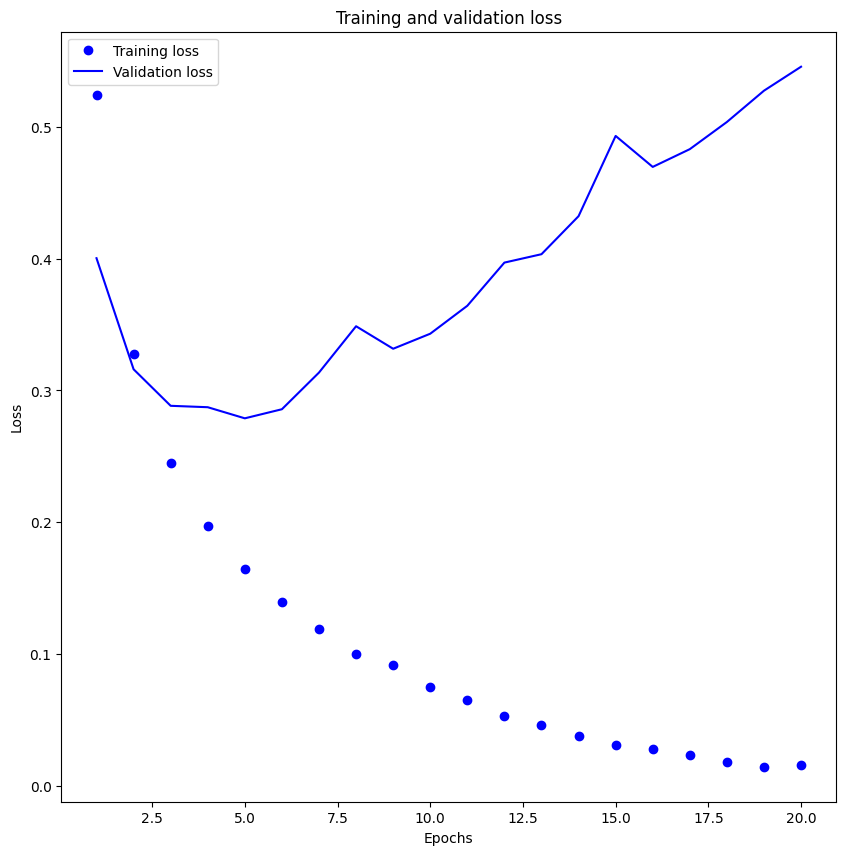

In [ ]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

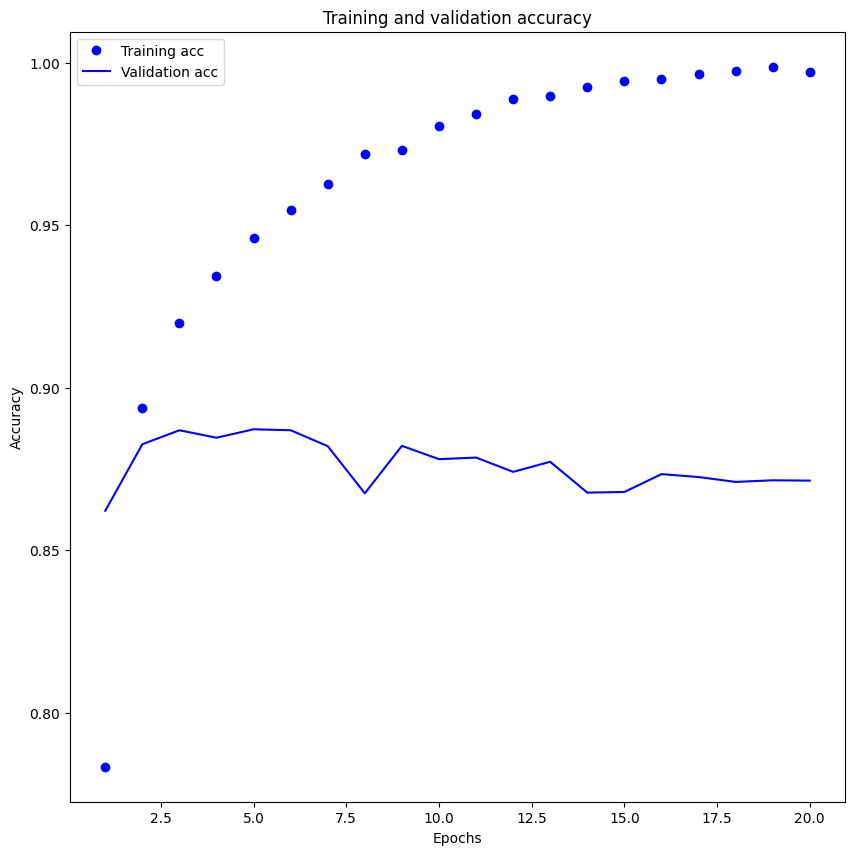

In [ ]:
plt.clf()   # 그래프를 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
val_loss

[0.4002780020236969,
 0.31603753566741943,
 0.28832152485847473,
 0.2872534394264221,
 0.2788293957710266,
 0.285720556974411,
 0.31353768706321716,
 0.3486691117286682,
 0.3315955698490143,
 0.34299933910369873,
 0.36419031023979187,
 0.3969391882419586,
 0.4033045768737793,
 0.4321531355381012,
 0.49301591515541077,
 0.4695088863372803,
 0.48298364877700806,
 0.5035736560821533,
 0.5273175239562988,
 0.5455008745193481]

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

history = model.fit(x_train, y_train, epochs=5, batch_size=512,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/5
30/30 [==============================] - 4s 109ms/step - loss: 0.5447 - accuracy: 0.7728 - val_loss: 0.4176 - val_accuracy: 0.8622
Epoch 2/5
30/30 [==============================] - 2s 55ms/step - loss: 0.3417 - accuracy: 0.8911 - val_loss: 0.3228 - val_accuracy: 0.8843
Epoch 3/5
30/30 [==============================] - 2s 60ms/step - loss: 0.2538 - accuracy: 0.9180 - val_loss: 0.2906 - val_accuracy: 0.8851
Epoch 4/5
30/30 [==============================] - 2s 52ms/step - loss: 0.2037 - accuracy: 0.9344 - val_loss: 0.2889 - val_accuracy: 0.8827
Epoch 5/5
782/782 [==============================] - 5s 4ms/step - loss: 0.2912 - accuracy: 0.8820


In [ ]:
results

[0.2912367284297943, 0.8819599747657776]

In [ ]:
x_test[:2]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [ ]:
result = model.predict(x_test[:2])

1/1 [==============================] - 0s 81ms/step


In [ ]:
result

array([[0.25900722],
       [0.9991779 ]], dtype=float32)

In [ ]:
(result>0.5).astype('int')

array([[0],
       [1]])

# CNN (Convolution Neural Network)

합성곱 : 입력되는 신호에 어떤 값을 곱해서 입력된 신호를 변환 하는 것을 말한다

합성곱 하는 이유 : 신호의 구분, 변형, 특징 추출의 효율성 증대

여기서, 곱해지는 값들을 커널이라 한다.

커널 = 필터 = 뉴런

## CNN의 전체 구조는 다음과 같다.

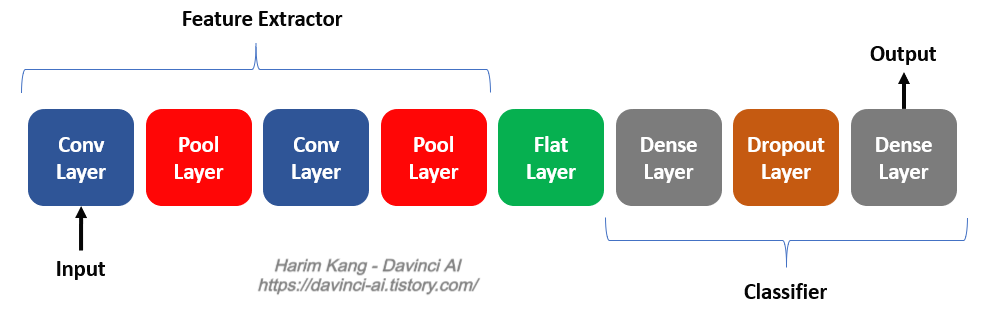

1. 합성곱층

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(32, kernel_size=(5, 5), padding='same' activation='relu',
                    input_shape=(28,28,1))

주요 인자

    - filters : 필터의 개수

    - kernel_size : 필터의 행렬 형태(shape)

    - padding :  패딩은 입력자료의 둘레에 0을 사방으로 모두 덧 붙여 주는 것을 의미한다.(zero-padding)

        padding = 'valid' 일때는 0 을 덧 붙이는 일을 하지 않는다.

        padding = 'same' 은 합성곱을 한 후에 입력 자료의 shape과 출력 자료의 shape 같아지도록  0 을 사방으로 덧 붙여 준다.

    - activation :  활성화 함수를 설정 한다.

    - strides : 행렬의 형태에서 필터가 입력자료에 곱해지기 위해 이동하는 칸 수 (대부분 1을 사용, (1,1) 과 같은 튜플 형태도 가능)

    - input_shape : 입력자료 한개의 형상, 모델에서 첫 입력층에만 사용

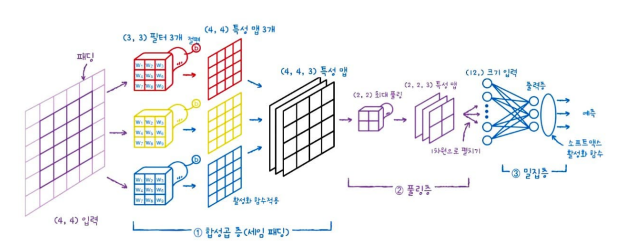

<혼자공부하는 머신러닝 + 딥러닝, 박해선, 한빛미디어>

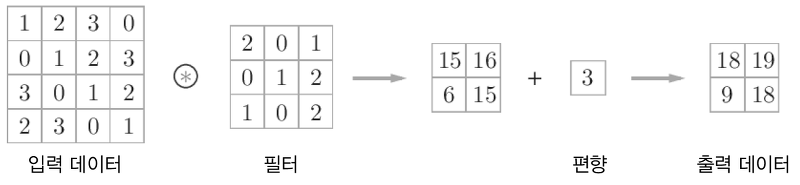

<밑바닥부터 시작하는 딥러닝, 사이토 고키, 한빛미디어>

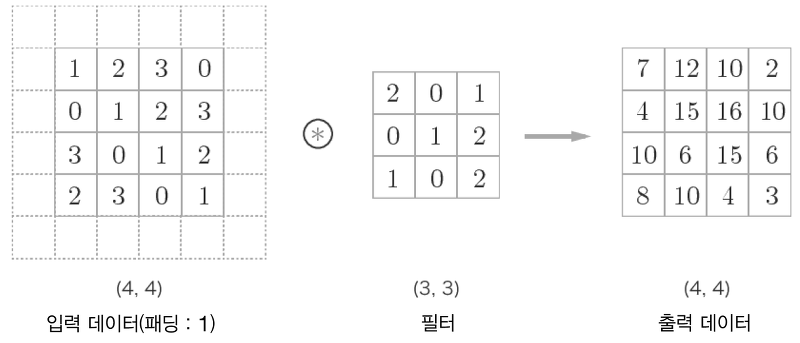

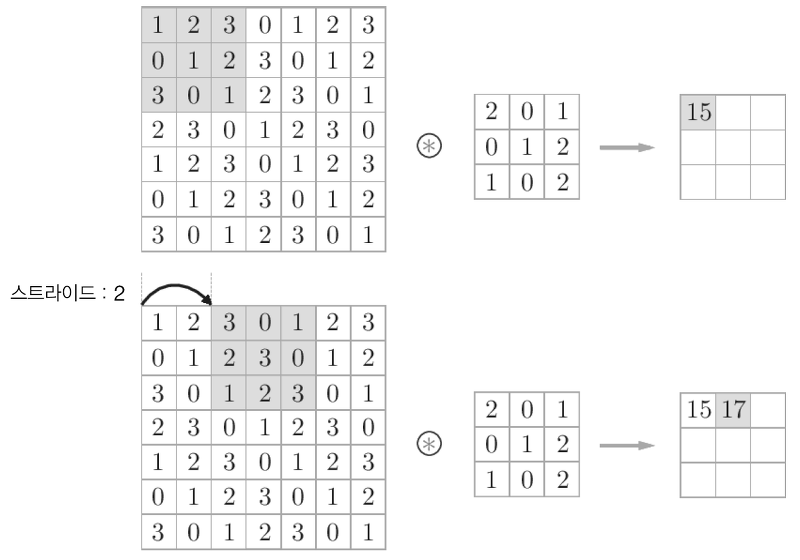

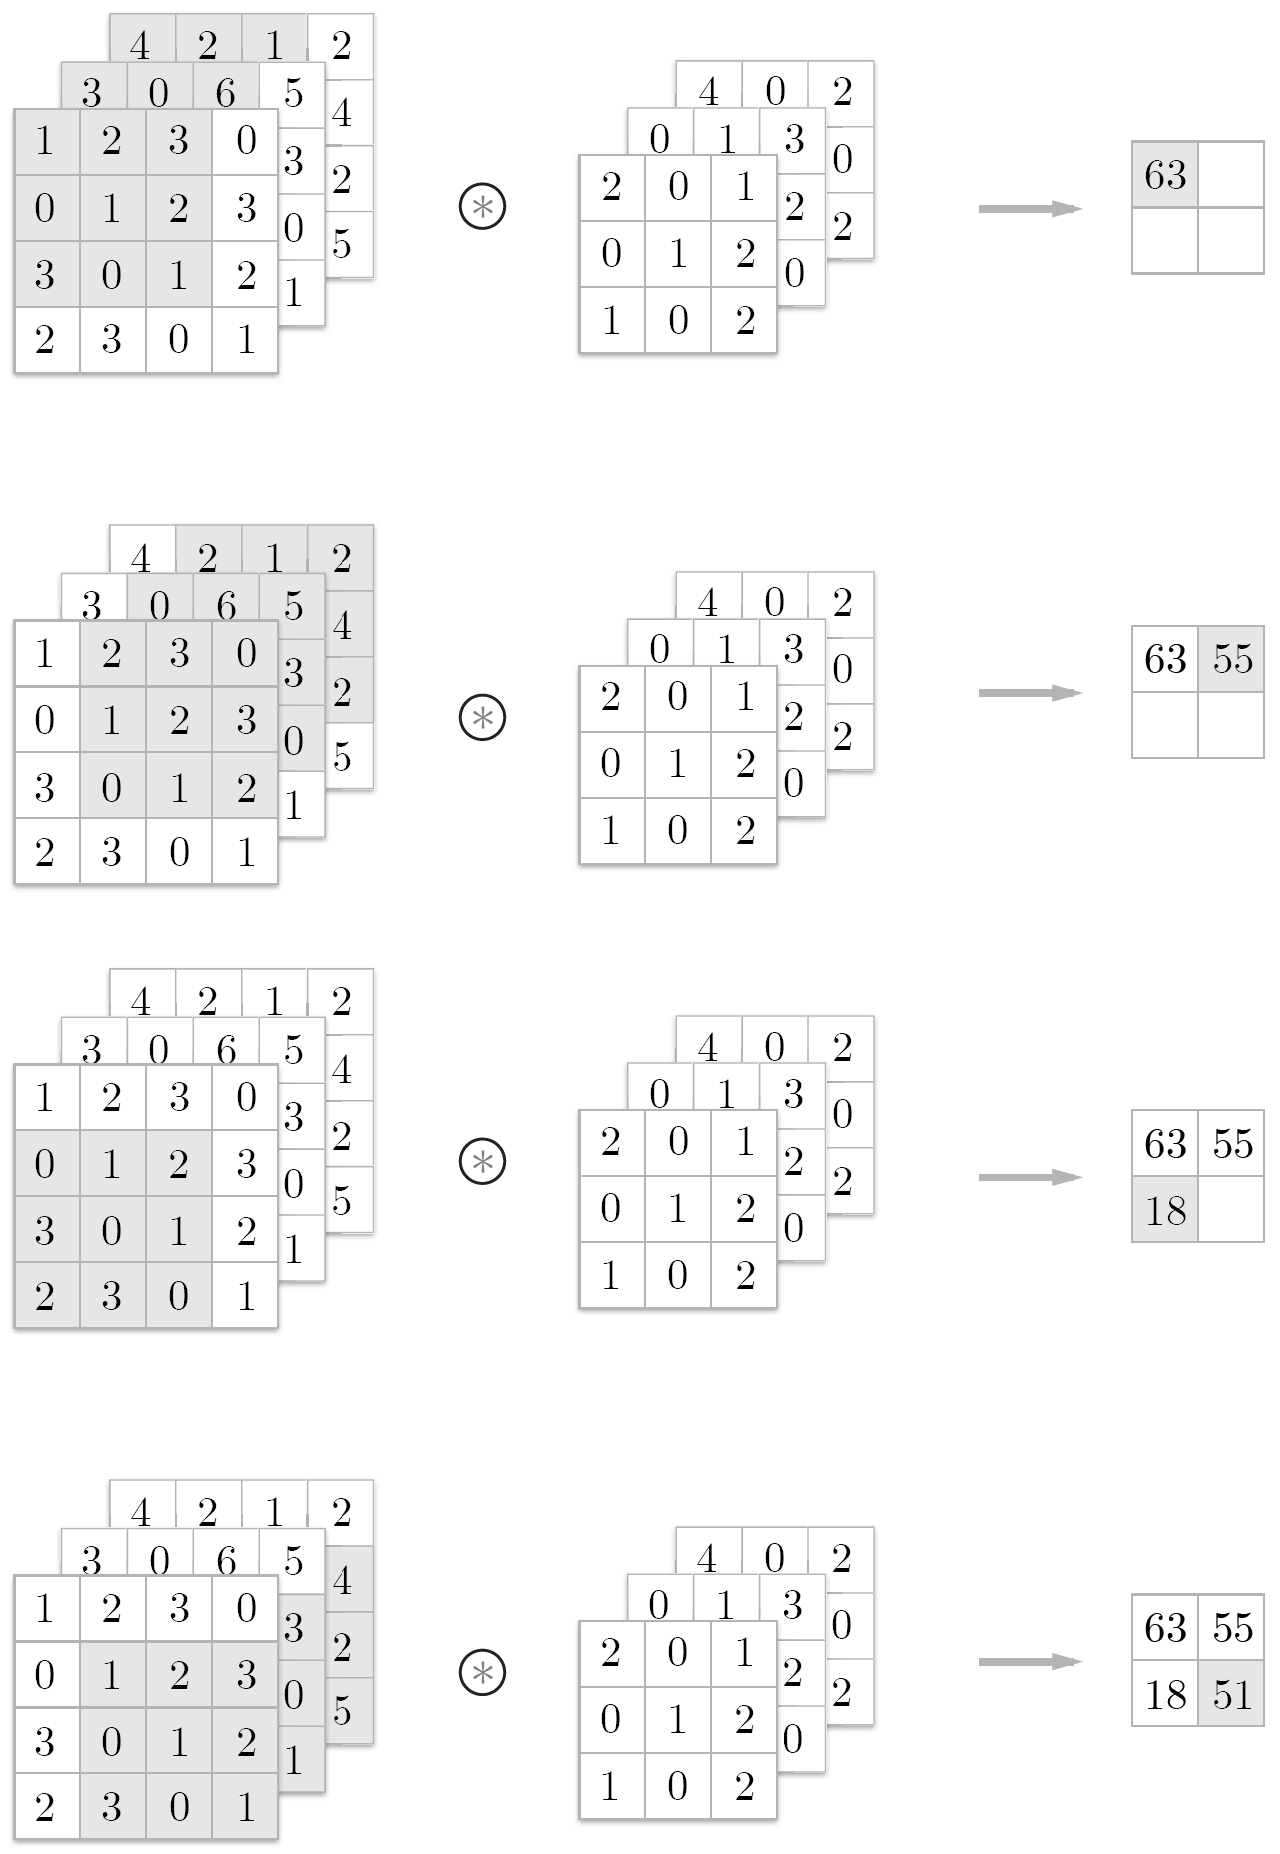

1) ouput 의 채널이 1인 경우

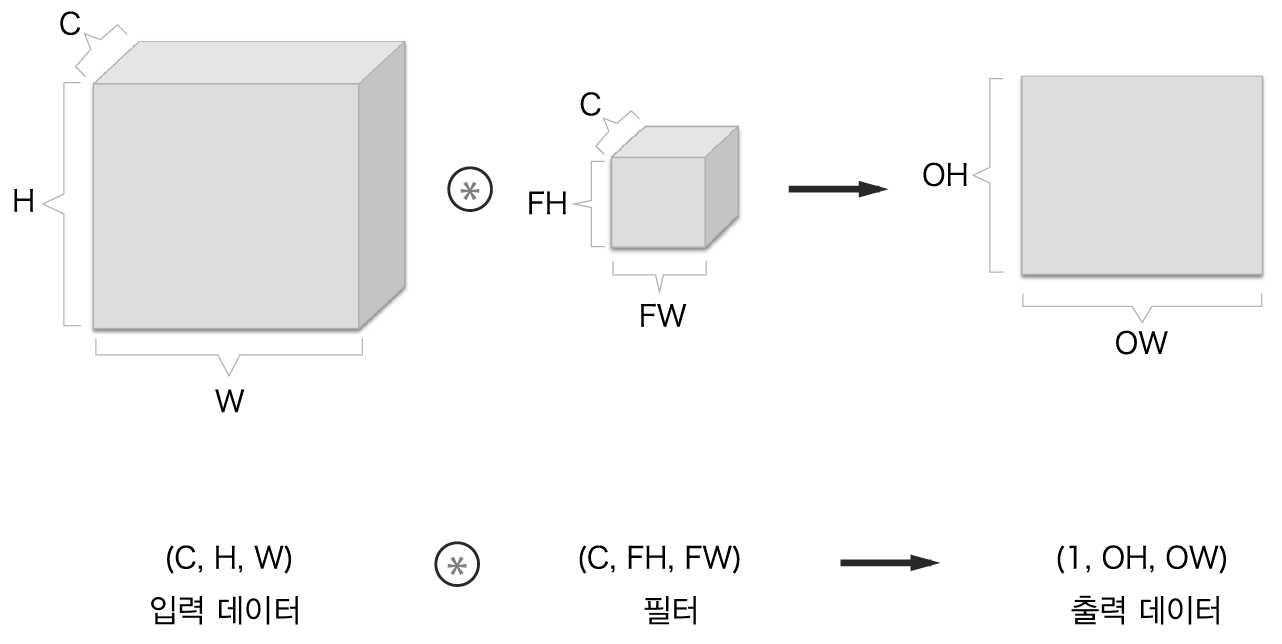

2) OUPUT 채널이 여럿인 경우

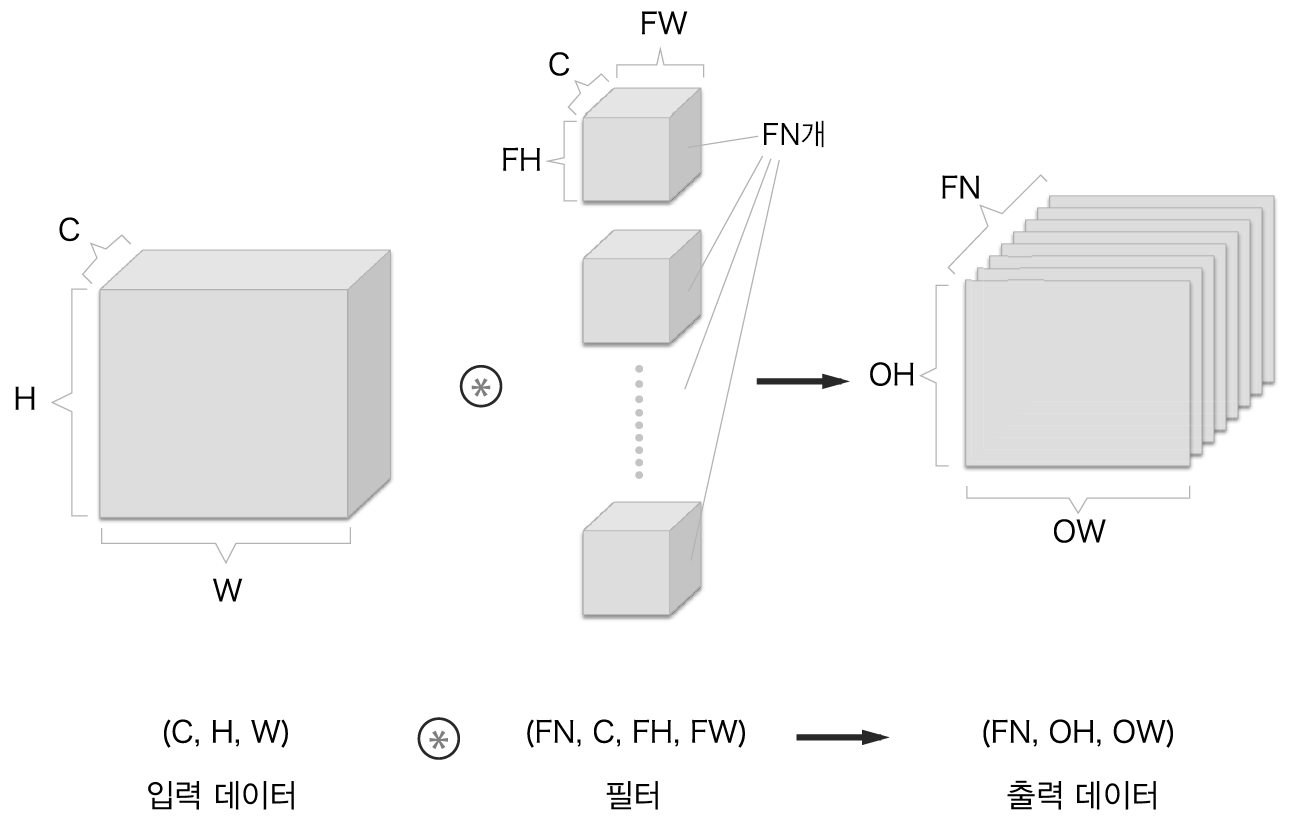

- 합성곱 : hadamard product 후 합계를 내어 산출값을 얻는 과정

- 입력자료의 채널수는 명시적으로 사용한다.

    예> 흑백이미지 -> (28, 28, 1)

    (60000, 28, 28, 1)

- 입력자료의 채널수와 필터의 채널수는 동일해야 한다.

- 특성 맵 : 합성곱을 한 후, 활성화 함수를 통과한 값들을 말함

- 필터의 갯수 대로 특성맵의 채널 수가 결정 된다.

Dense layer & CNN layer

입력 크기를 (H, W), 필터 크기를(FH, FW), 출력 크기를 (OH, OW) 로 했을 경우

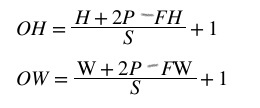

#Max pooling 층

- 가로 세로 크기만을 조절한다. 깊이(C) 있을땐 유지 한다.

- 가로 세로의 크기를 줄여주지만 특성맵의 개수는 줄여주지 않는다.

- 예시> (2, 2, 3) -> (1, 1, 3)

- 최대값만 뽑는 것 처럼 어떤 특징만 얻어 내는 것으로 생각 할 수 있다.

- 풀링층의 출력도 특성맵이라 한다.

- 스트라이드를 크게하여 특성맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이 경험적으로 더 나은 성능을 내기 때문(혼공)

- 평균 풀링 층은, AveragePooling2D를 이용한다.

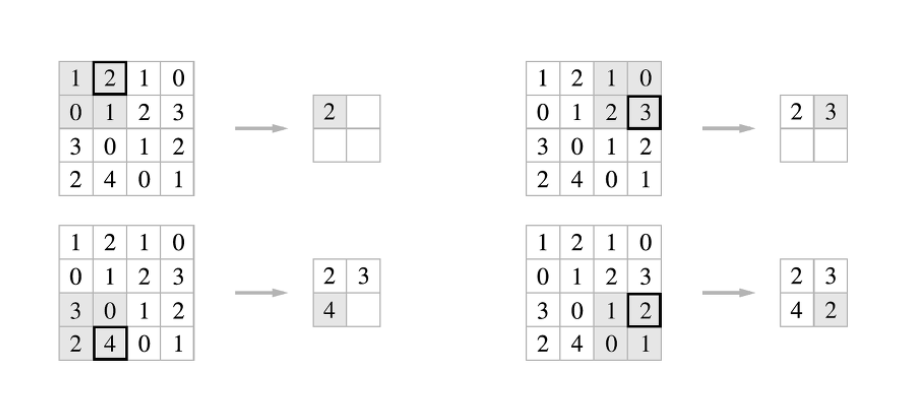

In [ ]:
keras.layers.MaxPooling2D(2, strides=2, padding='valid')